In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
import binance_framework as bf

In [4]:
#Note: BCH HAS MANY NULL VALUES, BETTER NOT INCLUDE IT
currencies = ['BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'XRPUSDT']
coins = pd.read_csv('bitcoin_datasets/interval_30min.csv')
coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            9981 non-null   int64  
 1   BTCUSDT Open Time                     9981 non-null   int64  
 2   BTCUSDT Open                          9981 non-null   float64
 3   BTCUSDT High                          9981 non-null   float64
 4   BTCUSDT Low                           9981 non-null   float64
 5   BTCUSDT Close                         9981 non-null   float64
 6   BTCUSDT Volume                        9981 non-null   float64
 7   BTCUSDT Close Time                    9981 non-null   int64  
 8   BTCUSDT Quote asset volume            9981 non-null   float64
 9   BTCUSDT n_trades                      9981 non-null   int64  
 10  BTCUSDT Taker buy base asset volume   9981 non-null   float64
 11  BTCUSDT Taker buy

In [5]:
bf.show_time_skips(coins, currencies)

Time difference:  30600000 BTCUSDT
time 1:  1565863200000 384
time 2:  1565832600000 383
Time difference:  30600000 ETHUSDT
time 1:  1565863200000 384
time 2:  1565832600000 383
Time difference:  30600000 LTCUSDT
time 1:  1565863200000 384
time 2:  1565832600000 383
Time difference:  30600000 XRPUSDT
time 1:  1565863200000 384
time 2:  1565832600000 383
Time difference:  9000000 BTCUSDT
time 1:  1573617600000 4688
time 2:  1573608600000 4687
Time difference:  9000000 ETHUSDT
time 1:  1573617600000 4688
time 2:  1573608600000 4687
Time difference:  9000000 LTCUSDT
time 1:  1573617600000 4688
time 2:  1573608600000 4687
Time difference:  9000000 XRPUSDT
time 1:  1573617600000 4688
time 2:  1573608600000 4687
Time difference:  9000000 BTCUSDT
time 1:  1574654400000 5260
time 2:  1574645400000 5259
Time difference:  9000000 ETHUSDT
time 1:  1574654400000 5260
time 2:  1574645400000 5259
Time difference:  9000000 LTCUSDT
time 1:  1574654400000 5260
time 2:  1574645400000 5259
Time differenc

In [6]:
bf.keep_one_timestamp(coins,currencies)

In [7]:
coins.drop('Unnamed: 0', axis=1, inplace=True)
bf.remove_ignore_columns(coins,currencies)
coins.set_index('Timestamp',inplace=True)

In [8]:
coins.head()

,BTCUSDT Open,BTCUSDT High,BTCUSDT Low,BTCUSDT Close,BTCUSDT Volume,BTCUSDT Quote asset volume,BTCUSDT n_trades,BTCUSDT Taker buy base asset volume,BTCUSDT Taker buy quote asset volume,ETHUSDT Open,...,LTCUSDT Taker buy quote asset volume,XRPUSDT Open,XRPUSDT High,XRPUSDT Low,XRPUSDT Close,XRPUSDT Volume,XRPUSDT Quote asset volume,XRPUSDT n_trades,XRPUSDT Taker buy base asset volume,XRPUSDT Taker buy quote asset volume
Timestamp,,,,,,,,,,,,,,,,,,,,,
1565144999999,11526.41,11605.36,11521.78,11599.02,898.978989,1.041019e+07,9217,569.436778,6.594922e+06,225.89,...,125983.034269,0.31191,0.31273,0.31160,0.31247,709973.7,221688.466179,1161,353963.8,110558.180061
1565146799999,11599.02,11694.02,11595.49,11642.31,1246.597465,1.452507e+07,12250,601.608124,7.009442e+06,226.57,...,107047.642015,0.31243,0.31322,0.31240,0.31279,725783.0,227012.329111,1250,333893.4,104433.582225
1565148599999,11645.26,11670.00,11566.42,11584.82,1051.269398,1.221591e+07,10124,698.846686,8.122098e+06,227.09,...,156351.193593,0.31276,0.31329,0.31205,0.31233,658995.6,206058.917099,1473,301353.9,94239.994702
1565150399999,11583.12,11649.38,11550.00,11640.43,970.668827,1.125256e+07,9867,539.844349,6.259183e+06,226.28,...,105692.339670,0.31223,0.31319,0.31209,0.31296,858944.3,268517.971170,1447,477992.0,149437.823676
1565152199999,11640.01,11692.18,11606.49,11645.00,857.594612,9.994900e+06,9381,457.270687,5.329949e+06,226.63,...,287563.576067,0.31294,0.31339,0.31213,0.31282,519766.6,162566.342424,1140,299354.8,93634.032934


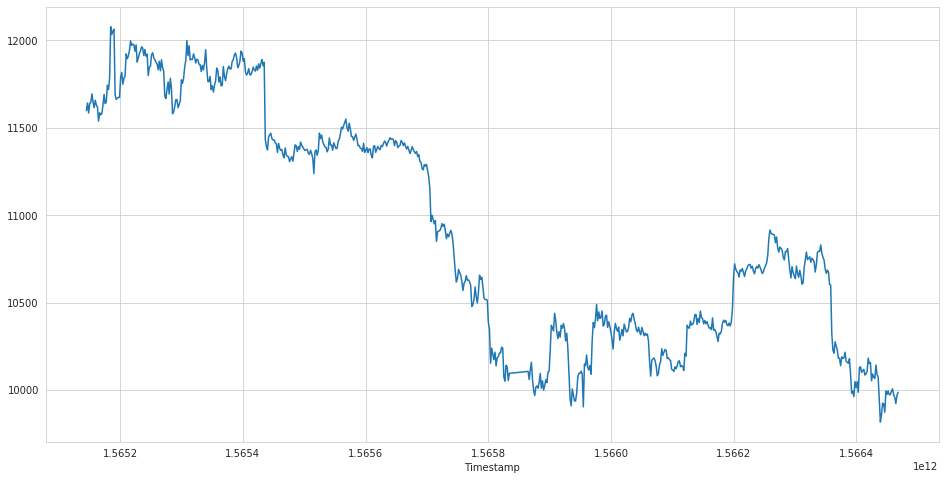

In [9]:
plt.figure(figsize=(16,8))
coins['BTCUSDT Close'].iloc[:720].plot()

In [10]:
SEQUENCE_LEN = 100 # 2 days and 4 hours
FUTURE_PERIOD_PREDICT = 5
RATIO_TO_PREDICT = 'BTCUSDT'

In [11]:
#i want to predict if in the next FUTURE_PERIOD_PREDICT
# the price will be higher than 1.25% of the current value
def classify(current_price, future_price):
    if future_price > (current_price + current_price*0.0125):
        return 1
    return 0

In [12]:
coins['Future Value'] = coins['BTCUSDT High'].shift(-FUTURE_PERIOD_PREDICT)
#coins['Future Value'] = 0.0
#coins.info()

In [13]:
coins['Target'] = list(map(classify, coins['BTCUSDT Close'], coins['Future Value']))

In [14]:
coins.dropna(inplace=True)

In [15]:
coins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 1565144999999 to 1583166599999
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   BTCUSDT Open                          9976 non-null   float64
 1   BTCUSDT High                          9976 non-null   float64
 2   BTCUSDT Low                           9976 non-null   float64
 3   BTCUSDT Close                         9976 non-null   float64
 4   BTCUSDT Volume                        9976 non-null   float64
 5   BTCUSDT Quote asset volume            9976 non-null   float64
 6   BTCUSDT n_trades                      9976 non-null   int64  
 7   BTCUSDT Taker buy base asset volume   9976 non-null   float64
 8   BTCUSDT Taker buy quote asset volume  9976 non-null   float64
 9   ETHUSDT Open                          9976 non-null   float64
 10  ETHUSDT High                          9976 non-null   float64
 

In [16]:
coins[ coins['Target'] ==0].count()[0]

9136

In [17]:
times = coins.index.values
last_10pct = times[-int(0.1*len(times))]

In [18]:
last_10pct

1581353999999

In [19]:
coins.index[-1]

1583166599999

In [20]:
validation_data = coins[ (coins.index >= last_10pct)]

In [21]:
coins = coins[ (coins.index < last_10pct)]
coins.drop('Future Value', axis=1, inplace=True)

In [22]:
from sklearn import preprocessing

In [23]:
for col in coins.columns:
    if col != 'Target':
        coins[col] = coins[col].pct_change()
        coins.dropna(inplace=True)
        coins[col] = preprocessing.scale(coins[col].values)

In [24]:
coins.dropna(inplace=True)

In [25]:
from collections import deque

In [26]:
sequential_data = []
prev_days = deque(maxlen=SEQUENCE_LEN)

In [27]:
for i in coins.values:
    prev_days.append([n for n in i[:-1]])
    if len(prev_days) == SEQUENCE_LEN:
        sequential_data.append([np.array(prev_days), i[-1]])

In [28]:
import random

In [29]:
random.shuffle(sequential_data)

In [30]:
sequential_data

[[array([[ 0.06060614, -0.41237655, -0.13090474, ...,  0.206986  ,
           0.5435861 ,  0.54718875],
         [-0.30066023, -0.01612153,  0.13664505, ..., -0.18607778,
           0.57514546,  0.58033762],
         [ 0.30271029,  0.68018302,  0.18398927, ...,  0.08307137,
          -0.37780456, -0.3783542 ],
         ...,
         [-0.3505807 , -0.24662564, -0.26162666, ...,  0.3061104 ,
           0.20863866,  0.20633208],
         [-0.0912758 , -0.04458595, -0.48701564, ..., -0.82442054,
          -0.57915508, -0.57982388],
         [-0.41149172,  0.14456165,  0.16116139, ..., -0.08216595,
          -0.32256722, -0.32234855]]),
  0.0],
 [array([[ 0.3340387 ,  0.10954961,  0.45081552, ..., -0.09893064,
          -0.05915962, -0.05849918],
         [ 0.00625576, -0.24549727, -0.10440272, ...,  0.6240849 ,
           0.12400963,  0.12247492],
         [-0.27087876, -0.02552646, -0.0894182 , ..., -0.40707327,
          -0.27848052, -0.27654512],
         ...,
         [-0.17010849, -0.

In [31]:
buys =[]
sells = []

In [32]:
for seq,target in sequential_data:
    if target == 0:
        sells.append([seq, target])
    elif target ==1:
        buys.append([seq,target])

In [33]:
random.shuffle(buys)
random.shuffle(sells)

In [34]:
lower = min(len(buys), len(sells))

In [35]:
buys = buys[:lower]
sells = sells[:lower]

In [36]:
sequential_data = buys+sells

In [37]:
random.shuffle(sequential_data)

In [38]:
X_train =[]
y_train = []

In [39]:
for seq,target in sequential_data:
    X_train.append(seq)
    y_train.append(target)

In [40]:
len(sells)

741

In [41]:
np.array(X_train)

array([[[ 1.31871079e-01,  2.56517365e-01,  1.44014447e-01, ...,
          3.18683016e-01,  3.13030030e-01,  3.17101652e-01],
        [ 2.90506186e-01, -7.25643362e-02, -3.87003372e-02, ...,
         -3.20340243e-01, -4.50115758e-01, -4.49847373e-01],
        [-2.34181503e-01, -2.77524949e-02,  5.49835804e-02, ...,
         -7.20879025e-01, -5.65534346e-01, -5.66295437e-01],
        ...,
        [-6.64005658e-01, -2.49735498e-01, -8.57493098e-02, ...,
         -2.84340685e-01, -5.16184675e-01, -5.18049540e-01],
        [ 7.90514309e-02,  4.60562313e-01,  3.23862815e-01, ...,
         -1.74888386e-01,  2.24226734e-01,  2.25106214e-01],
        [ 6.80579372e-01,  1.55205092e-02, -4.71564272e-01, ...,
         -5.94624184e-03, -4.85119571e-01, -4.86177698e-01]],

       [[ 2.09719755e-01,  2.38063668e-01,  4.25634301e-01, ...,
          2.29327409e-01,  4.12792644e-01,  4.16911673e-01],
        [ 3.69643691e-01, -6.99683952e-02,  9.68846606e-02, ...,
         -2.49160731e-02, -4.70162868e

In [42]:
EPOCHS = 15
BATCH_SIZE = 64
NAME = 'SEQ-'+ str(SEQUENCE_LEN)+'-FUTPRED-'+str(FUTURE_PERIOD_PREDICT)+'-PRED-'+str(time.time())

In [43]:
NAME

'SEQ-100-FUTPRED-5-PRED-1583178936.1367948'